# Digit display - EDA

This script was formed, to contain digit display functions and initial analysis of given data set.

## Displaying function

2


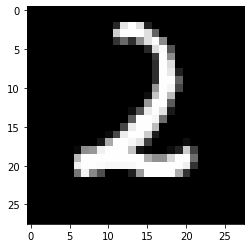

In [17]:
import numpy as np
data = np.loadtxt("./DATA/digits2k_pixels.data.gz", ndmin=2)/255.0
data.shape = (data.shape[0], int(np.sqrt(data.shape[1])), int(np.sqrt(data.shape[1])))
labels = np.loadtxt("./DATA/digits2k_pixels.labels.gz", dtype='int')
# display:
import matplotlib.pyplot as plt
i = 122
print(labels[i])
plt.imshow(data[i,:,:], cmap=plt.get_cmap("gray"))
plt.show()

This function comes from: http://www.gagolewski.com/resources/data/clustering/
It was not primarly written by us, but will be used and transformed in further research.

## Data

Given dataset is a three dimentional array.  
Outer array can be treated as an array for all bitmaps.  
All bitmaps contain numbers from [0,1] which correspond to visibility of each point. (0 for black, 1 for white)

## Class balance

In [80]:
import pandas as pd
a = np.bincount(labels)
pd.DataFrame({
    'Digits': range(0,10,1),
    'Count': a
}).style.hide_index()

Digits,Count
0,191
1,220
2,198
3,191
4,214
5,180
6,200
7,224
8,172
9,210


As we can see, there are enough instances of each digit to form some patterns.

## Displaying a sample of 100 digits of each kind

In [2]:
import random
np.random.seed(12) # so the results are reproducible

In [3]:
import matplotlib.pyplot as plt

def DisplaySampleOfDigit(digit, nrow=10, ncol=10):
    n = nrow*ncol
    positions_of_digit = np.where(labels == digit)
    positions_of_digit = positions_of_digit[0] # upper function returned a tuple
    # random selection of n positions
    np.random.shuffle(positions_of_digit)
    positions_to_use = positions_of_digit[0:n]
    # setting up image display
    fig, axs = plt.subplots(nrow, ncol, figsize=(20, 20))
    
    for i in range(nrow):
        for j in range(ncol):
            axs[i, j].imshow(data[positions_to_use[i*nrow+j],:,:], cmap=plt.get_cmap("gray"))
    

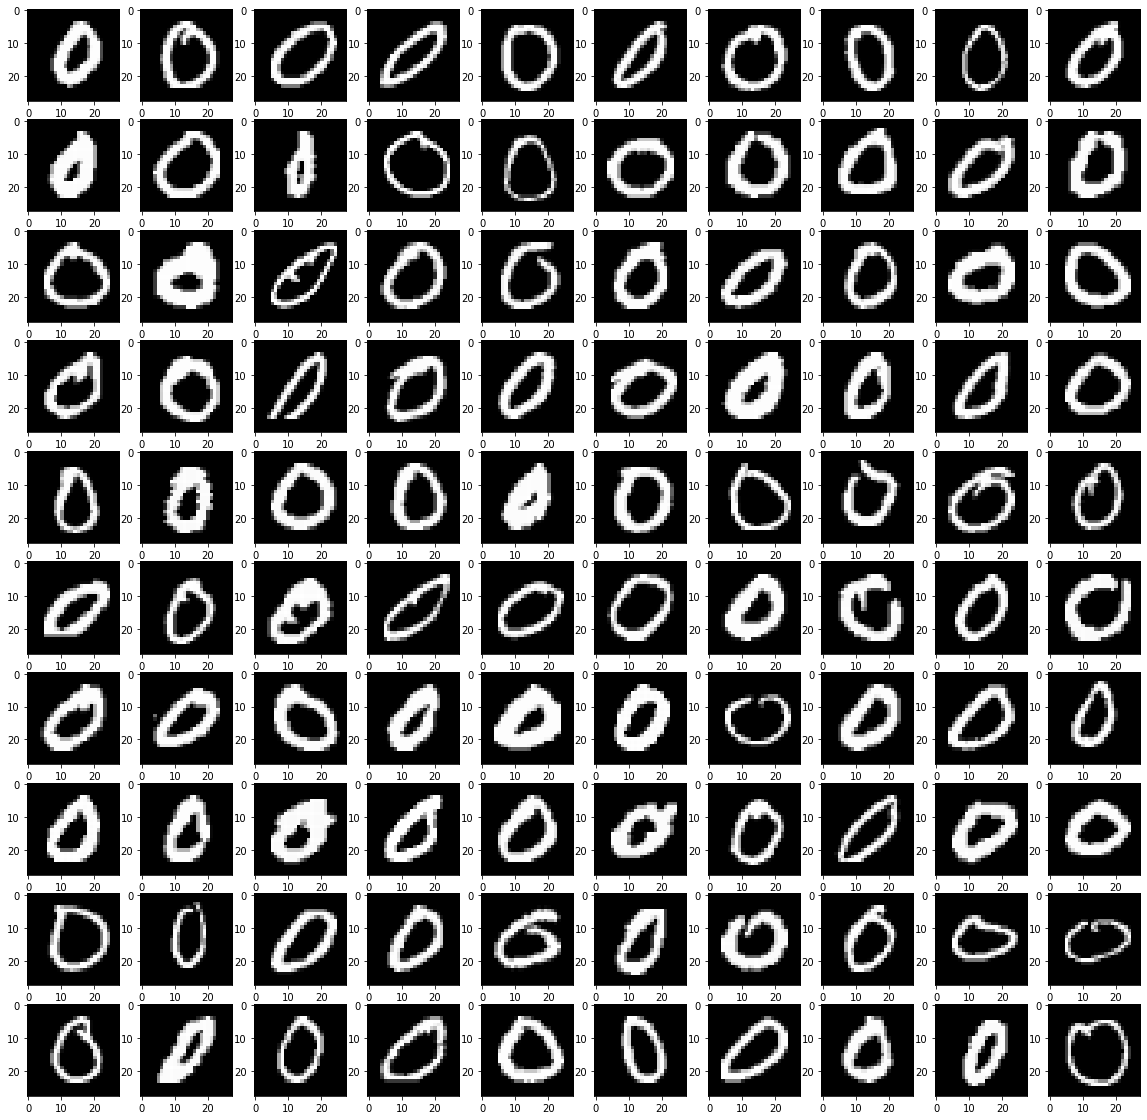

In [4]:
DisplaySampleOfDigit(0)

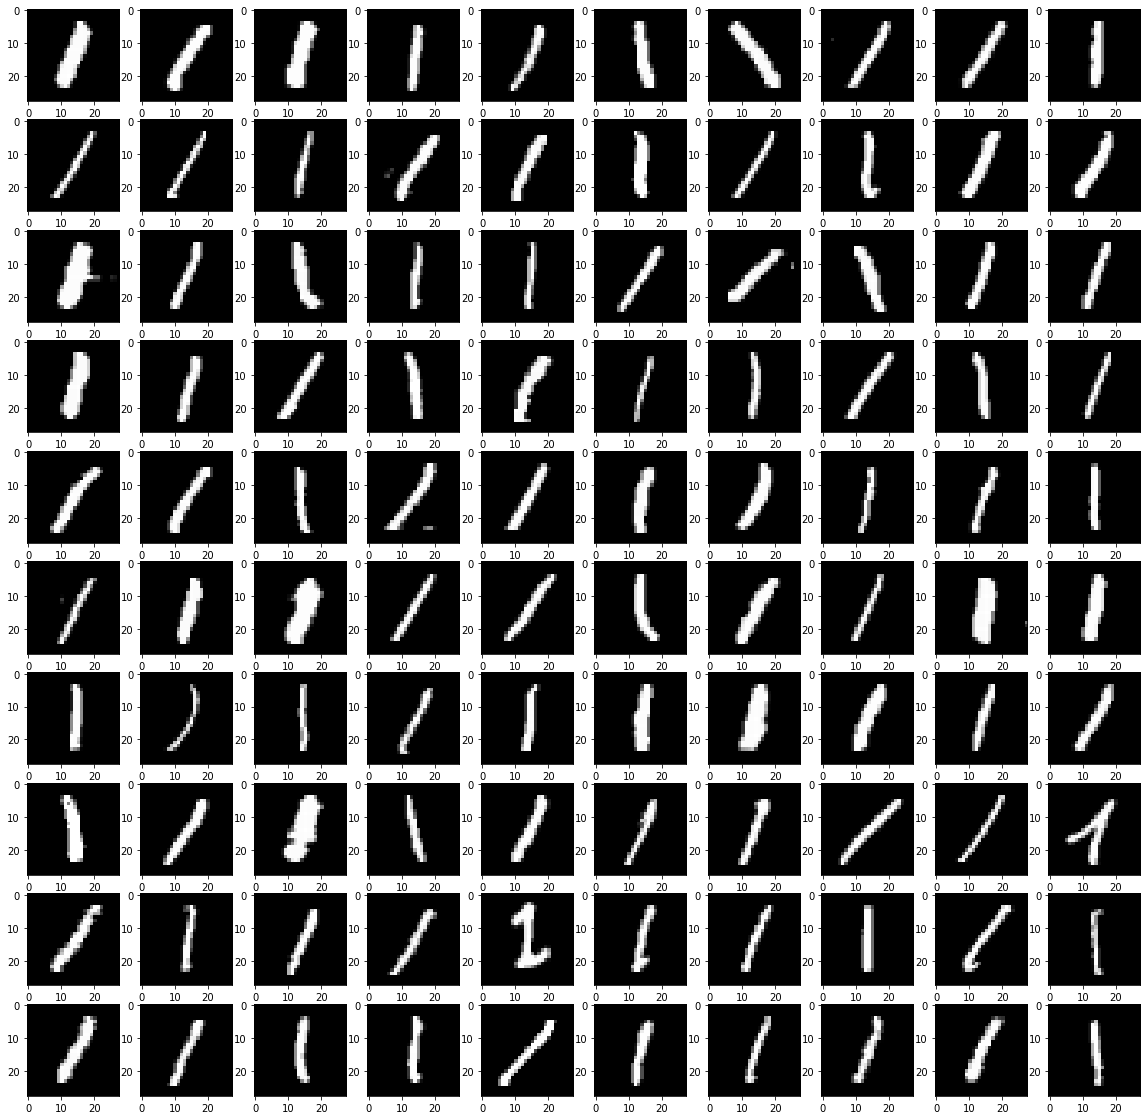

In [5]:
DisplaySampleOfDigit(1)

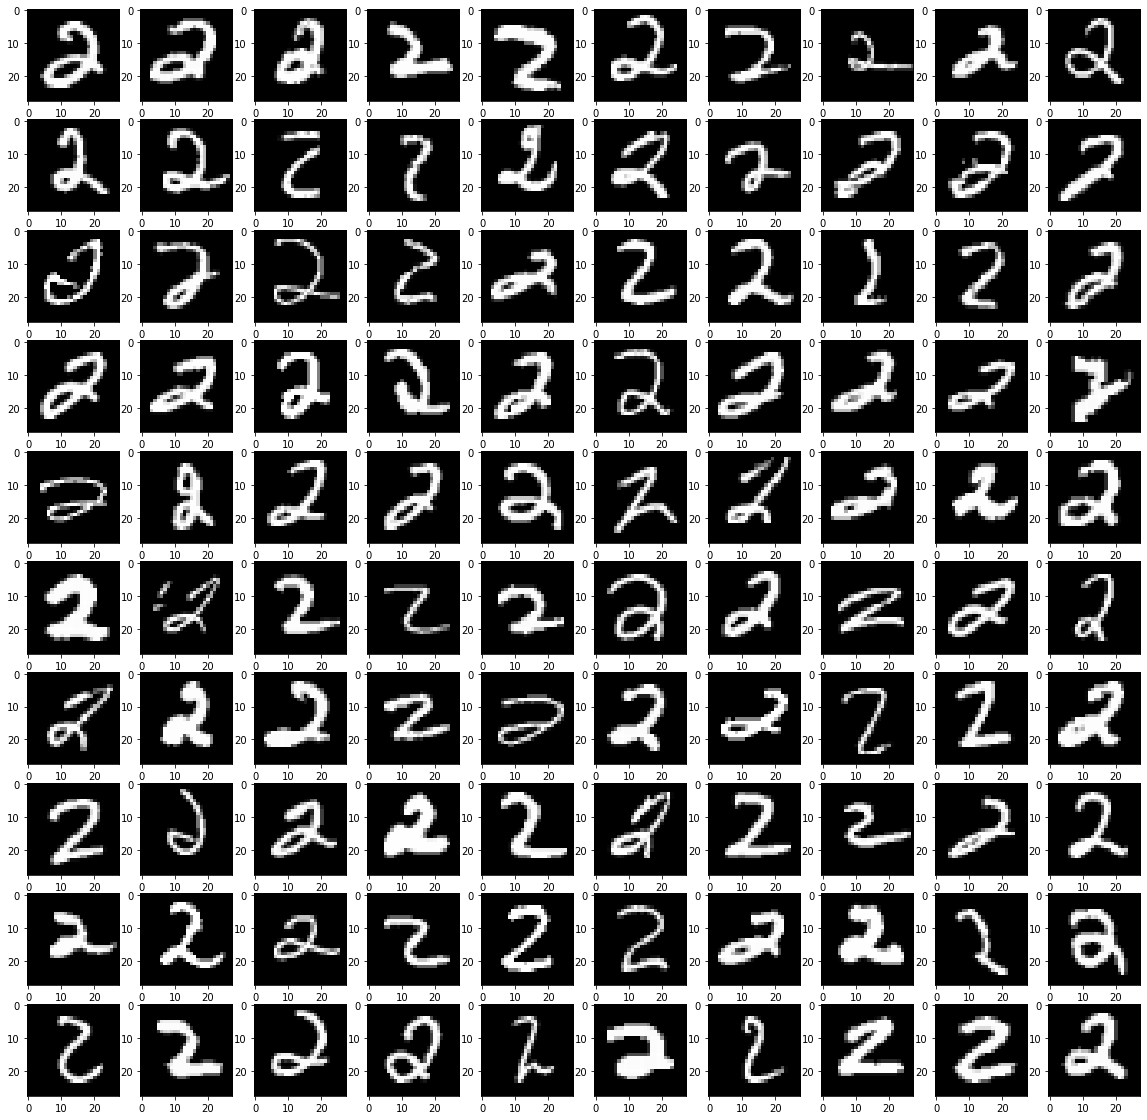

In [6]:
DisplaySampleOfDigit(2)

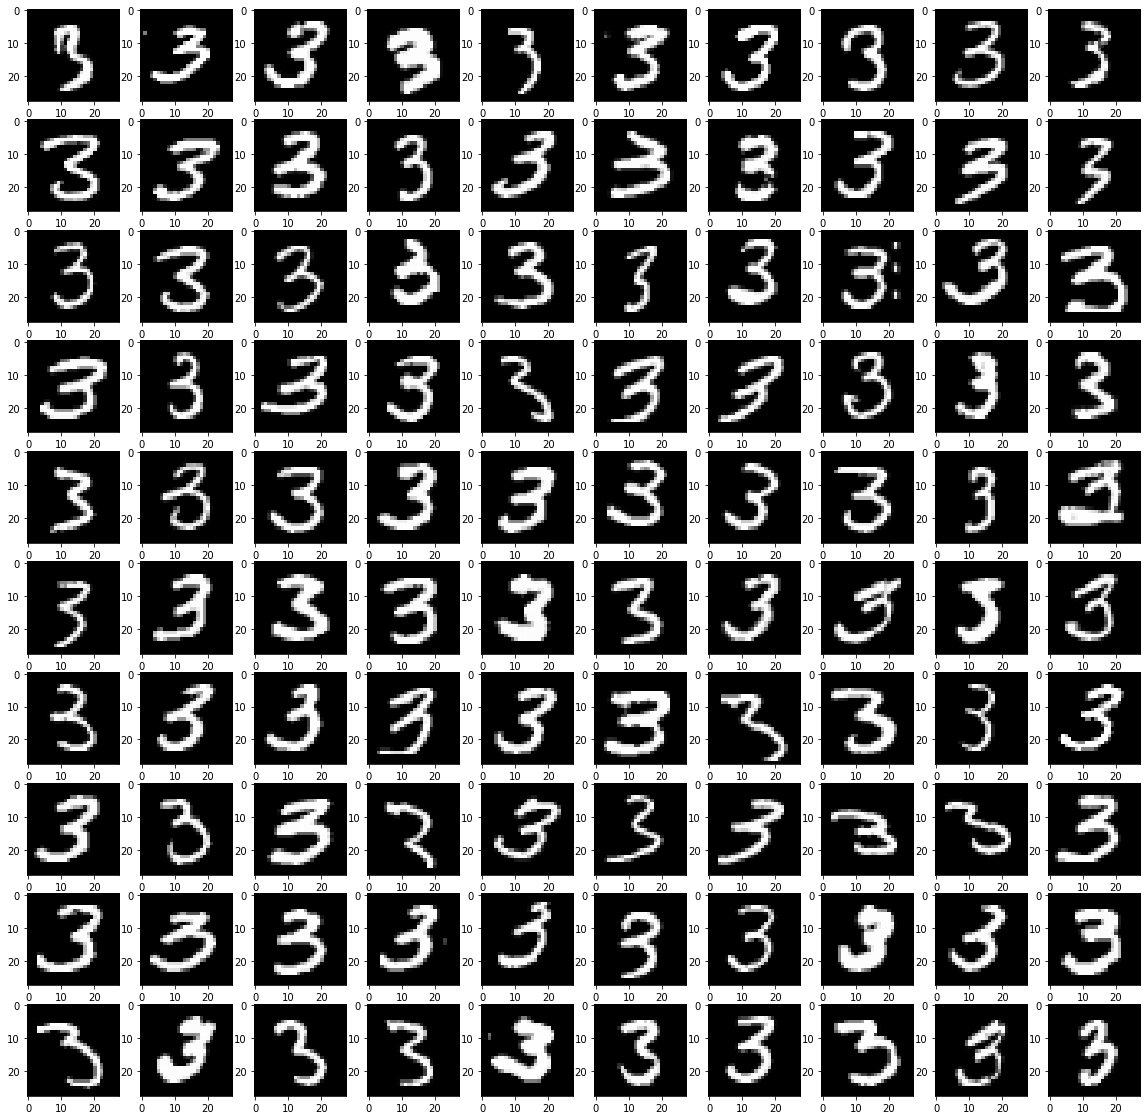

In [7]:
DisplaySampleOfDigit(3)

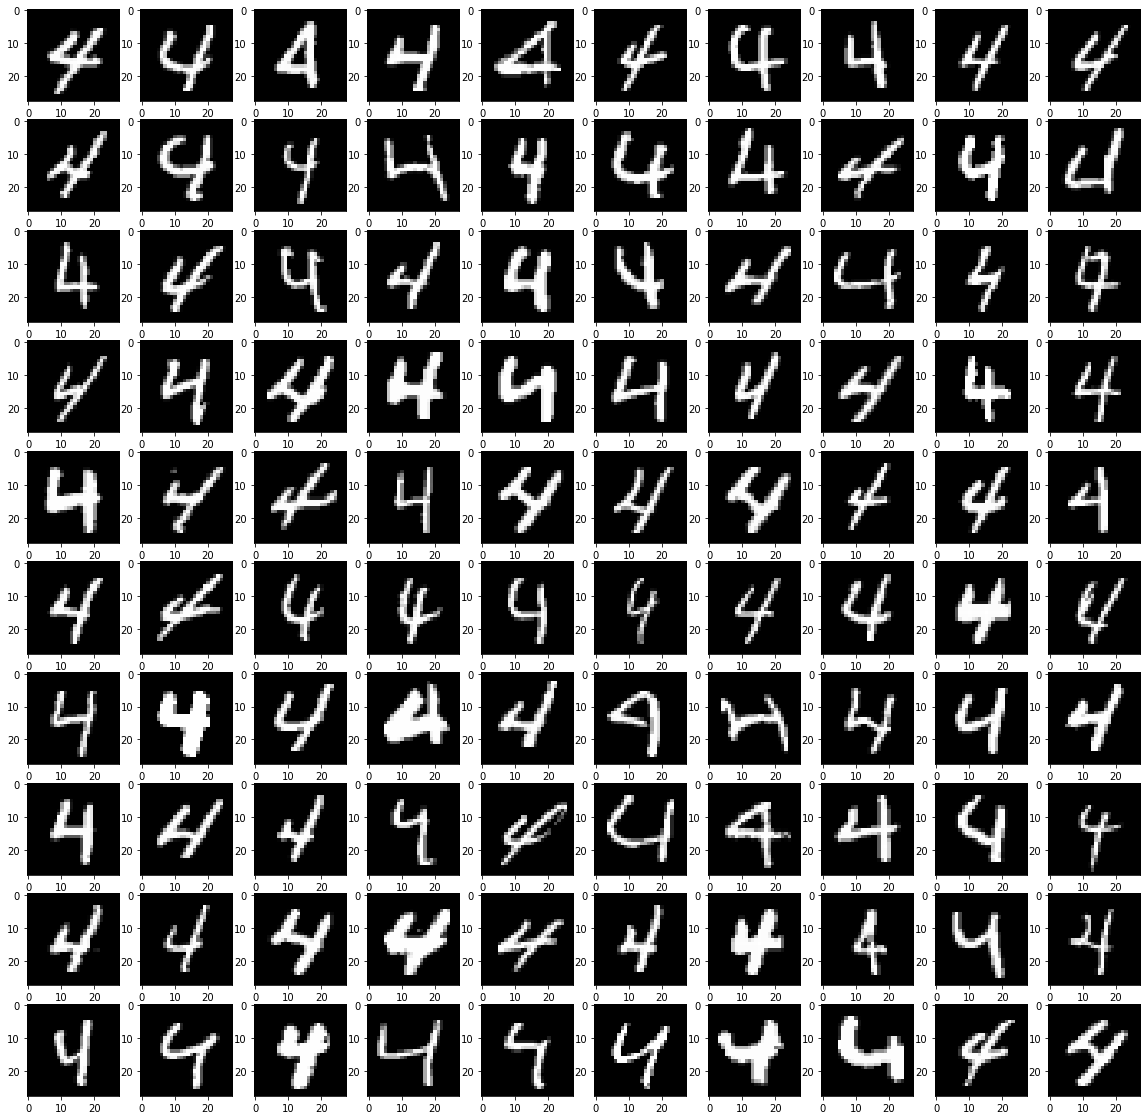

In [8]:
DisplaySampleOfDigit(4)

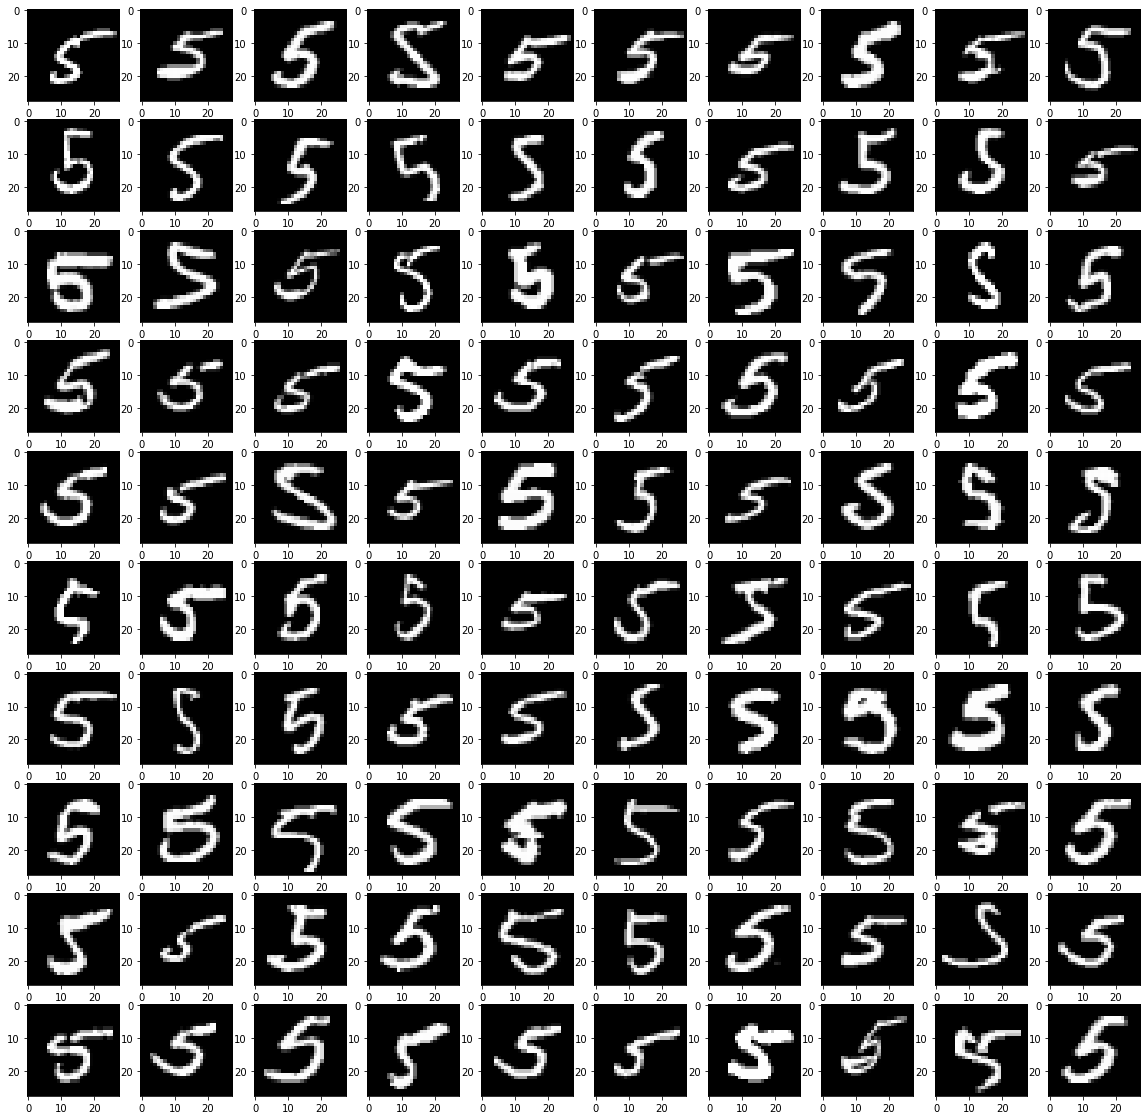

In [9]:
DisplaySampleOfDigit(5)

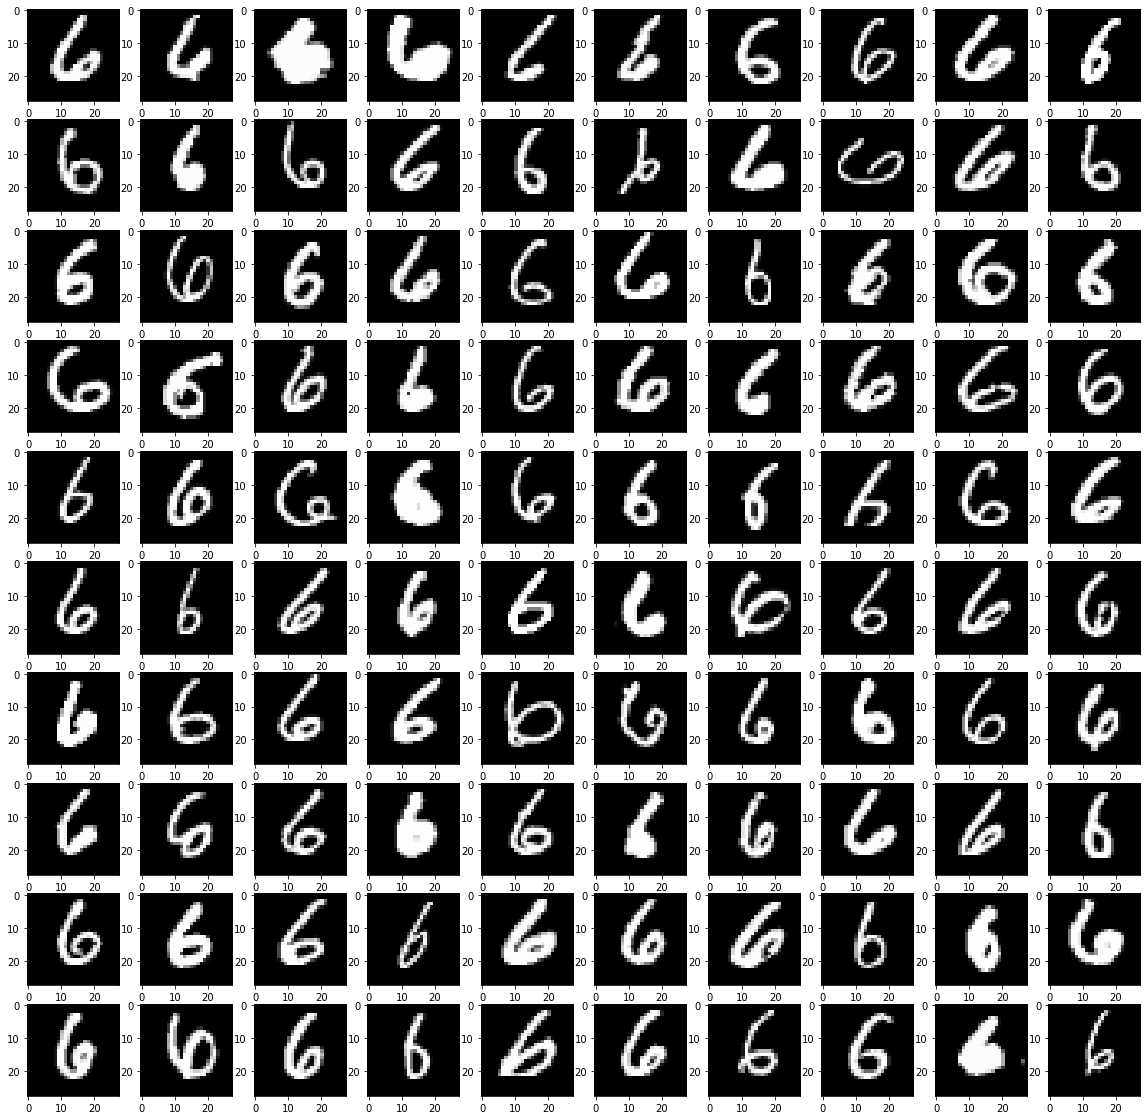

In [10]:
DisplaySampleOfDigit(6)

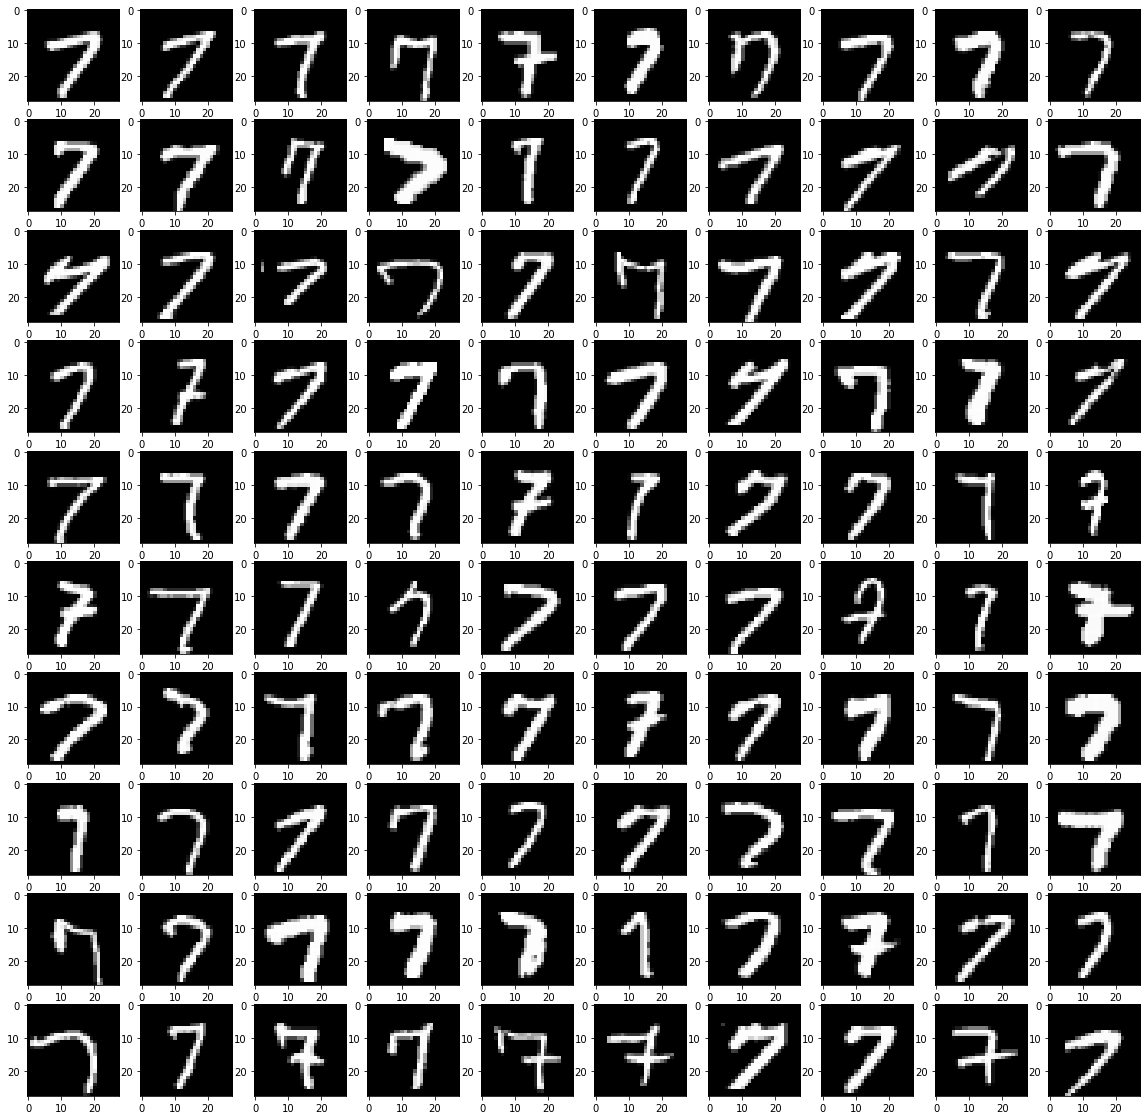

In [11]:
DisplaySampleOfDigit(7)

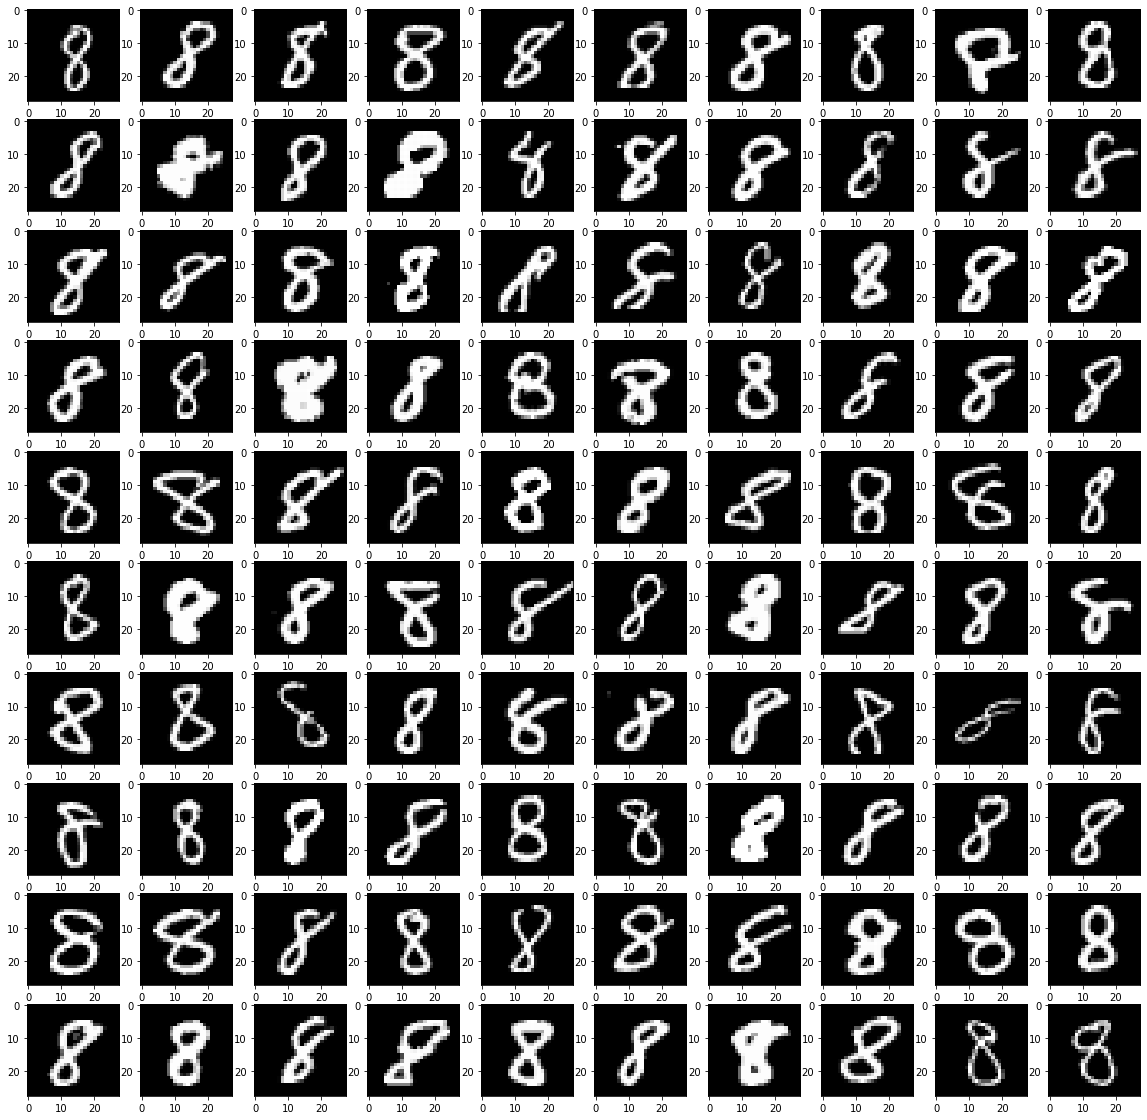

In [12]:
DisplaySampleOfDigit(8)

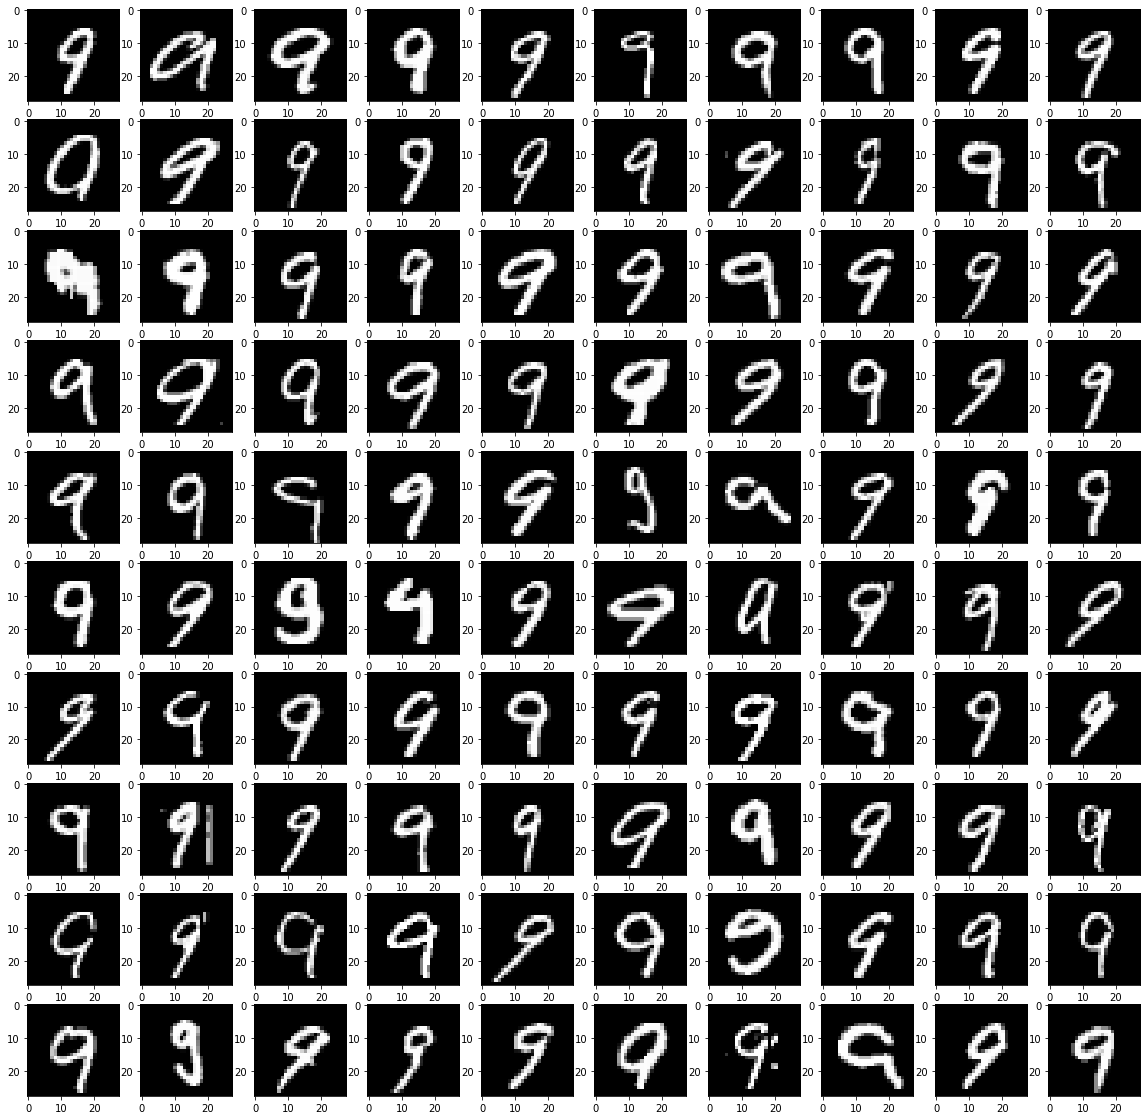

In [13]:
DisplaySampleOfDigit(9)

In each case, we can observe that most of the digits follow the same pattern(which should ease the process of clustering).
However, there are some cases where digits are very hard to categorize even for human.

## Comparing only black-white solution with continous gray scale

In [52]:
def onlyBlackWhite(array, threshold = 0.80):
    result = array.copy()
    for i in range(len(result)):
        for j in range(len(result[0])):
            if (result[i,j] < threshold):
                result[i,j] = 0
            else:
                result[i,j] = 1
    return result

def takeNRandomDigits(digit, n):
    positions_of_digit = np.where(labels == digit)
    positions_of_digit = positions_of_digit[0] # upper function returned a tuple
    # random selection of n positions
    np.random.shuffle(positions_of_digit)
    positions_to_use = positions_of_digit[0:n]
    return positions_to_use

def compareNRandomDigitPlots(digit, n = 5):
    nrow = n
    ncol = 2
    positions = takeNRandomDigits(digit, n)   
    fig, axs = plt.subplots(nrow, ncol, figsize=(5, 10))
    
    for i in range(nrow):
        axs[i, 0].imshow(data[positions[i],:,:], cmap=plt.get_cmap("gray"))
        axs[i, 1].imshow(onlyBlackWhite(data[positions[i],:,:]), cmap=plt.get_cmap("gray"))
    

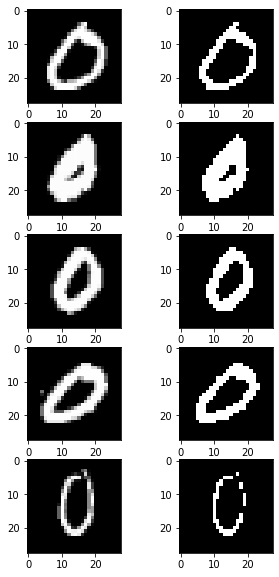

In [54]:
compareNRandomDigitPlots(0,5)

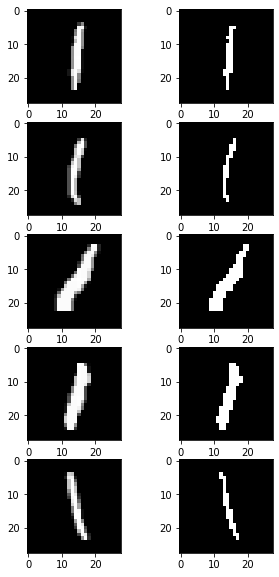

In [55]:
compareNRandomDigitPlots(1,5)

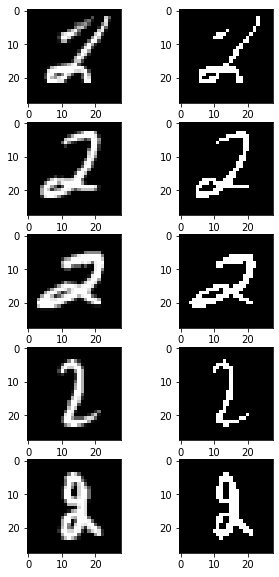

In [56]:
compareNRandomDigitPlots(2,5)

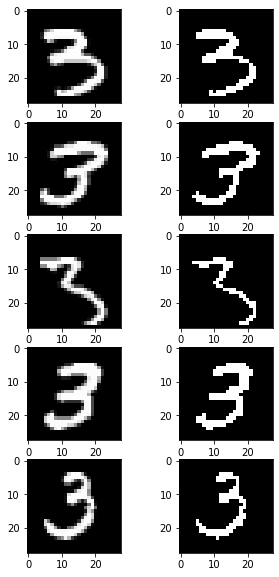

In [57]:
compareNRandomDigitPlots(3,5)

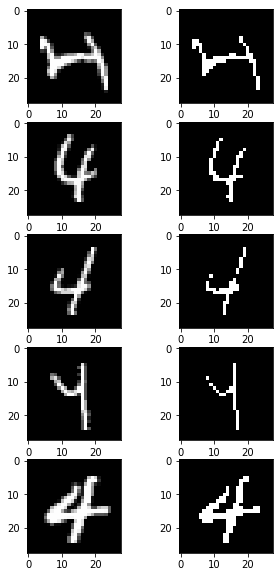

In [58]:
compareNRandomDigitPlots(4,5)

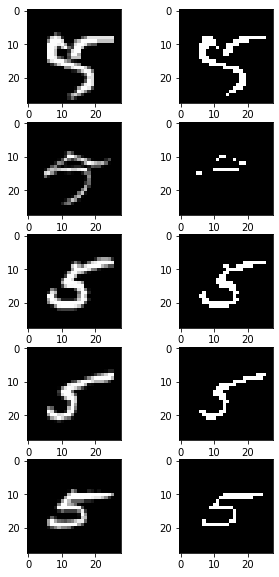

In [59]:
compareNRandomDigitPlots(5,5)

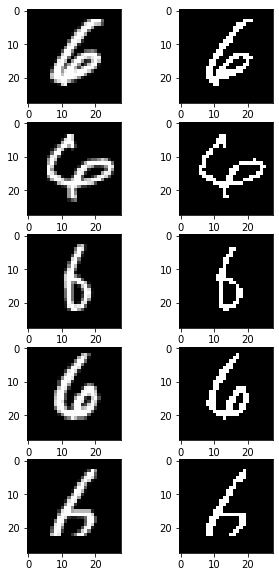

In [60]:
compareNRandomDigitPlots(6,5)

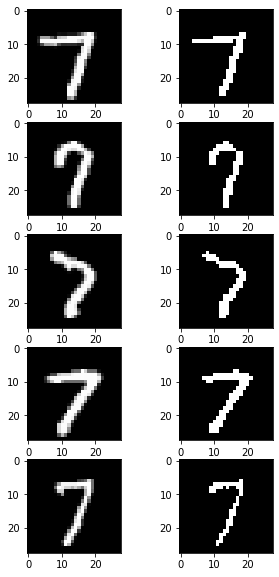

In [61]:
compareNRandomDigitPlots(7,5)

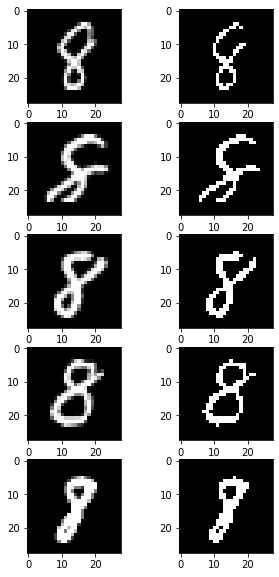

In [62]:
compareNRandomDigitPlots(8,5)

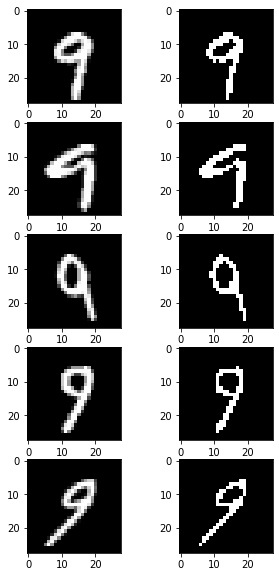

In [63]:
compareNRandomDigitPlots(9,5)

Transition to binary scale may result in some loss of information, but in most cases it makes a digit better visible for the eye. We will examine how it affects the algorithm in further research.